In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')

In [3]:
#Adding a column source to train and test data.
train['source'] = 'train'
test['source'] = 'test'

In [4]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,source
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,train
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,train
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,train
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,train
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,train


In [5]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,source
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked,test
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked,test
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN,test
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN,test
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked,test


In [6]:
#Merging the train and test
data = pd.concat([train,test], ignore_index = True, sort = True)
data.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
0,Rural,3.0,95.12,18.0,No,Male,0,0,30669,NaN,train,0.0,children
1,Urban,58.0,87.96,39.2,Yes,Male,0,1,30468,never smoked,train,0.0,Private
2,Urban,8.0,110.89,17.6,No,Female,0,0,16523,NaN,train,0.0,Private
3,Rural,70.0,69.04,35.9,Yes,Female,0,0,56543,formerly smoked,train,0.0,Private
4,Rural,14.0,161.28,19.1,No,Male,0,0,46136,NaN,train,0.0,Never_worked


In [7]:
train.shape, test.shape, data.shape

((43400, 13), (18601, 12), (62001, 13))

In [8]:


data.describe()

,age,avg_glucose_level,bmi,heart_disease,hypertension,id,stroke
count,62001.000000,62001.000000,59948.000000,62001.000000,62001.000000,62001.000000,43400.000000
mean,42.169475,104.453832,28.587099,0.047677,0.093450,36452.514814,0.018041
std,22.522100,42.960537,7.766122,0.213083,0.291065,21067.155945,0.133103
min,0.080000,55.000000,10.100000,0.000000,0.000000,1.000000,0.000000
25%,24.000000,77.540000,23.200000,0.000000,0.000000,18187.000000,0.000000
50%,44.000000,91.660000,27.700000,0.000000,0.000000,36463.000000,0.000000
75%,60.000000,112.120000,32.800000,0.000000,0.000000,54693.000000,0.000000
max,82.000000,291.050000,97.600000,1.000000,1.000000,72943.000000,1.000000


In [9]:
data.isnull().sum()

Residence_type           0
age                      0
avg_glucose_level        0
bmi                   2053
ever_married             0
gender                   0
heart_disease            0
hypertension             0
id                       0
smoking_status       19043
source                   0
stroke               18601
work_type                0
dtype: int64

In [10]:
#Checking for the count of unique values in the data. 
data.apply(lambda x: len(x.unique()))

Residence_type           2
age                    104
avg_glucose_level    14143
bmi                    583
ever_married             2
gender                   3
heart_disease            2
hypertension             2
id                   62001
smoking_status           4
source                   2
stroke                   3
work_type                5
dtype: int64

In [11]:
#Sum of all the null values in the data. 
data.isnull().values.sum()

39697

In [12]:
#Checking the categorical fatures in the data.
categorical_features = data.select_dtypes(include = [np.object]) 
categorical_features

,Residence_type,ever_married,gender,smoking_status,source,work_type
0,Rural,No,Male,NaN,train,children
1,Urban,Yes,Male,never smoked,train,Private
2,Urban,No,Female,NaN,train,Private
3,Rural,Yes,Female,formerly smoked,train,Private
4,Rural,No,Male,NaN,train,Never_worked
...,...,...,...,...,...,...
61996,Rural,No,Male,formerly smoked,test,Private
61997,Rural,Yes,Male,smokes,test,Govt_job
61998,Rural,Yes,Female,never smoked,test,Private
61999,Rural,Yes,Male,never smoked,test,Govt_job


In [13]:
#Checking for the numerical variables in the data.
numerical_features = data.select_dtypes(include = np.number) #check
numerical_features

,age,avg_glucose_level,bmi,heart_disease,hypertension,id,stroke
0,3.0,95.12,18.0,0,0,30669,0.0
1,58.0,87.96,39.2,0,1,30468,0.0
2,8.0,110.89,17.6,0,0,16523,0.0
3,70.0,69.04,35.9,0,0,56543,0.0
4,14.0,161.28,19.1,0,0,46136,0.0
...,...,...,...,...,...,...,...
61996,20.0,74.43,18.4,0,0,67353,NaN
61997,61.0,211.55,31.6,0,0,362,NaN
61998,79.0,125.74,29.4,0,0,29839,NaN
61999,55.0,69.46,33.8,0,0,6438,NaN


In [14]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [15]:
data['smoking_status'].fillna(data['smoking_status'].mode()[0], inplace = True)

In [16]:
data.isnull().sum()

Residence_type           0
age                      0
avg_glucose_level        0
bmi                      0
ever_married             0
gender                   0
heart_disease            0
hypertension             0
id                       0
smoking_status           0
source                   0
stroke               18601
work_type                0
dtype: int64

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])

In [18]:
#Splitting the data back into test and train.
train = data.loc[data['source'] == 'train']  #Divide into test and train back
test = data.loc[data['source'] == 'test']

In [19]:
#Dropping columns from test and train data. 
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [20]:
#Creating seperate csv files for test and train data. 
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [21]:
train.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,stroke,work_type
0,0,3.0,95.12,18.0,0,1,0,0,30669,1,0.0,4
1,1,58.0,87.96,39.2,1,1,0,1,30468,1,0.0,2
2,1,8.0,110.89,17.6,0,0,0,0,16523,1,0.0,2
3,0,70.0,69.04,35.9,1,0,0,0,56543,0,0.0,2
4,0,14.0,161.28,19.1,0,1,0,0,46136,1,0.0,1


In [22]:
train.shape

(43400, 12)

In [23]:
train.isnull().sum()

Residence_type       0
age                  0
avg_glucose_level    0
bmi                  0
ever_married         0
gender               0
heart_disease        0
hypertension         0
id                   0
smoking_status       0
stroke               0
work_type            0
dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler() 
scalar.fit(train) 
scaled_data = scalar.transform(train)

In [25]:
X = train.drop(['stroke'], axis = 1)
y = train['stroke'].values.reshape(-1,1)

In [26]:
X.shape, y.shape

((43400, 11), (43400, 1))

[0.02285084 0.19148112 0.219246   0.20448207 0.01033183 0.02344514
 0.01374221 0.01234201 0.21774895 0.04172222 0.0426076 ]


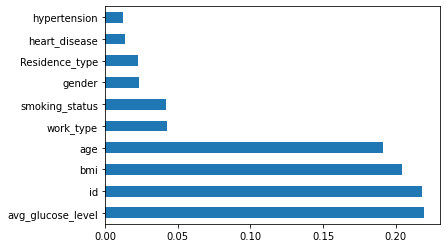

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

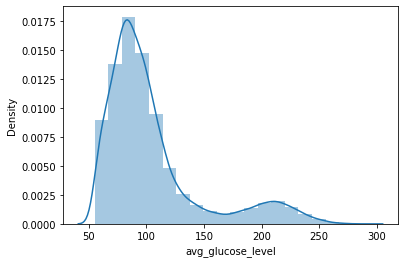

In [28]:
sns.distplot(data['avg_glucose_level'], bins=20)

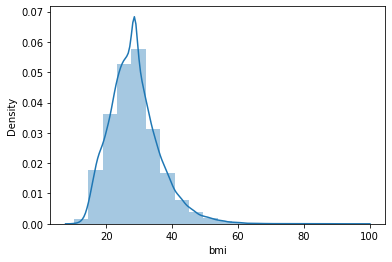

In [29]:
sns.distplot(data['bmi'], bins=20)

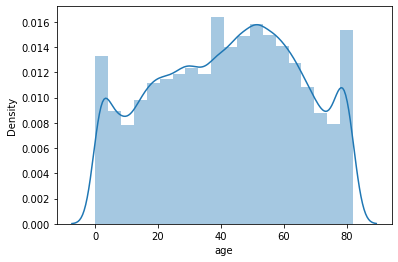

In [30]:
sns.distplot(data['age'], bins=20)

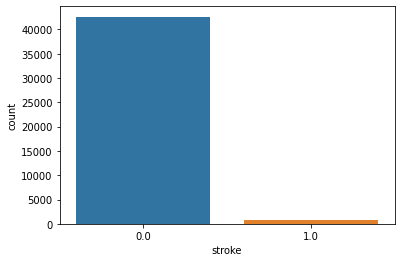

In [31]:
sns.countplot(data['stroke'])

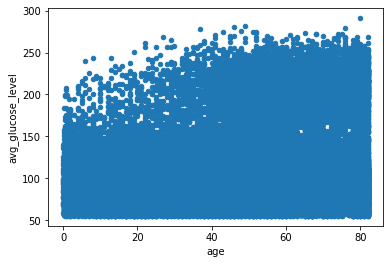

In [32]:
data.plot.scatter('age','avg_glucose_level')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

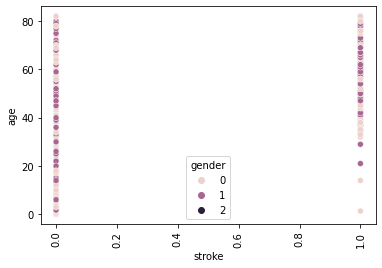

In [33]:
sns.scatterplot(x= 'stroke', y='age', hue='gender', sizes= (15,200), data=data)
plt.xticks(rotation=90)

In [34]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (30380, 11)
Number transactions y_train dataset:  (30380, 1)
Number transactions X_test dataset:  (13020, 11)
Number transactions y_test dataset:  (13020, 1)


In [35]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report 
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     12799
         1.0       0.00      0.00      0.00       221

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



In [36]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
# describes info about train and test set 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))  

After OverSampling, the shape of train_X: (59636, 11)
After OverSampling, the shape of train_y: (59636,) 

After OverSampling, counts of label '1': 29818
After OverSampling, counts of label '0': 29818


In [37]:
y_train_res

array([0., 0., 0., ..., 1., 1., 1.])

In [66]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res) 
predictions2 = lr1.predict(X_test) 
  
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
result = confusion_matrix(y_test, predictions2)
print("Confusion Matrix:", result)

result = accuracy_score(y_test,predictions2)
print("Accuracy:",result)

print("Weighted Precision :%f" % precision_score(predictions2,y_test,average="weighted"))

# print classification report 
print(classification_report(y_test, predictions2)) 

Confusion Matrix: [[8935 3864]
 [  50  171]]
Accuracy: 0.6993855606758833
Weighted Precision :0.721547
              precision    recall  f1-score   support

         0.0       0.99      0.70      0.82     12799
         1.0       0.04      0.77      0.08       221

    accuracy                           0.70     13020
   macro avg       0.52      0.74      0.45     13020
weighted avg       0.98      0.70      0.81     13020



In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [50,20,100,200]}
grid_rm = GridSearchCV(clf, param_grid = params, scoring = 'accuracy', cv=10)
grid_rm.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                  

In [40]:
grid_rm.best_params_

{'n_estimators': 100}

In [41]:
clf1 = RandomForestClassifier(max_depth=2, n_estimators = 100, random_state=0)
clf1.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
clf1.score(X_test, y_test)

0.6927035330261136

In [43]:
y_predrf = clf1.predict(X_test)

In [65]:
result = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:", result)

result = accuracy_score(y_test,y_predrf)
print("Accuracy:",result)

print("Weighted Precision :%f" % precision_score(y_predrf,y_test,average="weighted"))

# print classification report 
print(classification_report(y_test, y_predrf)) 

Confusion Matrix: [[8836 3963]
 [  38  183]]
Accuracy: 0.6927035330261136
Weighted Precision :0.734211
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.82     12799
         1.0       0.04      0.83      0.08       221

    accuracy                           0.69     13020
   macro avg       0.52      0.76      0.45     13020
weighted avg       0.98      0.69      0.80     13020



In [45]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [46]:
model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
from sklearn.model_selection import GridSearchCV
param = {
    'criterion': ['entropy', 'gini'],
    'max_depth' :[2,3,4,5]
}
grid_svc = GridSearchCV(model, param_grid=param, scoring='accuracy', cv=10)

In [48]:
grid_svc.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                  

In [49]:
grid_svc.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [50]:
modeldf= tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 5)
modeldf.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
modeldf.score(X_test, y_test)

0.9411674347158218

In [54]:
y_preddf= modeldf.predict(X_test)

In [64]:
from sklearn.metrics import precision_score
result = confusion_matrix(y_test, y_preddf)
print("Confusion Matrix:", result)

result = accuracy_score(y_test,y_preddf)
print("Accuracy:",result)

print("Weighted Precision :%f" % precision_score(y_pred,y_test,average="weighted"))

# print classification report 
print(classification_report(y_test, y_preddf)) 

Confusion Matrix: [[12223   576]
 [  190    31]]
Accuracy: 0.9411674347158218
Weighted Precision :0.917014
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     12799
         1.0       0.05      0.14      0.07       221

    accuracy                           0.94     13020
   macro avg       0.52      0.55      0.52     13020
weighted avg       0.97      0.94      0.95     13020



In [56]:
cm_logistic= confusion_matrix(y_test, predictions2)
cm_randomforest= confusion_matrix(y_test, y_predrf)
cm_decisiontree= confusion_matrix(y_test, y_preddf)

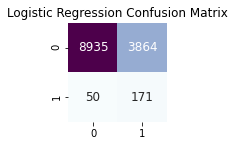

In [57]:
#Confusion Matrix
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logistic,annot=True,cmap="BuPu",fmt="d",cbar=False, annot_kws={"size": 12})
plt.show()

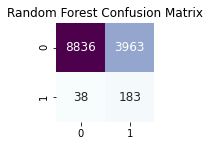

In [58]:
plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_randomforest,annot=True,cmap="BuPu",fmt="d",cbar=False, annot_kws={"size": 12})
plt.show()

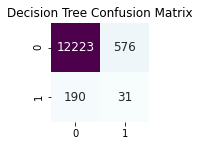

In [59]:
plt.subplot(2,3,2)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_decisiontree,annot=True,cmap="BuPu",fmt="d",cbar=False, annot_kws={"size": 12})
plt.show()

In [61]:
solution = pd.read_csv("test_modified.csv")
solution.drop(['stroke'],axis=1,inplace=True)
solution.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,work_type
0,1,80.0,83.84,21.1,1,1,0,0,36306,0,2
1,0,74.0,179.50,26.0,1,0,1,0,61829,0,3
2,0,14.0,95.16,21.2,0,0,0,0,14152,1,4
3,1,28.0,94.76,23.4,0,1,0,0,12997,1,2
4,0,63.0,83.57,27.6,1,0,0,0,40801,1,0


In [62]:
sol = modeldf.predict(solution)
sol[:10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])